### Obesity Trenfds - Obesity is a worldwide problem which causes a lot of serious medical problems. Obesity will be increased, about 45% out of the whole population by 2035. The proportion of morbid obese and the actual costs on healthcare will be increased. Implementation of a system that could estimate the percentage of obese population for particular time duration given the age range, income range, location, high confidence level and low confidence level of obesity, education, gender, the class level, etc. of the population can help in fight against obesity.

- Build a machine learning model to estimate the percentage of obese population.

- Dataset Link: https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [5]:
df.drop(['Data_Value_Unit'],axis=1,inplace=True)

In [6]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print(categorical)
print(len(categorical))

['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']
24


In [7]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
print(numerical)
print(len(numerical))

['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'LocationID']
8


In [8]:
for var in df[categorical]:
    print(f"{df[var].name} : {df[var].isnull().sum()}")

LocationAbbr : 0
LocationDesc : 0
Datasource : 0
Class : 0
Topic : 0
Question : 0
Data_Value_Type : 0
Data_Value_Footnote_Symbol : 48346
Data_Value_Footnote : 48346
Total : 51485
Age(years) : 41954
Education : 45764
Gender : 49578
Income : 40043
Race/Ethnicity : 38136
GeoLocation : 1008
ClassID : 0
TopicID : 0
QuestionID : 0
DataValueTypeID : 0
StratificationCategory1 : 0
Stratification1 : 0
StratificationCategoryId1 : 0
StratificationID1 : 0


In [9]:
for var in df[numerical]:
    print(f"{df[var].name} : {df[var].isnull().sum()}")

YearStart : 0
YearEnd : 0
Data_Value : 5046
Data_Value_Alt : 5046
Low_Confidence_Limit : 5046
High_Confidence_Limit  : 5046
Sample_Size : 5046
LocationID : 0


In [10]:
# Fill missing values for numerical columns with the mean
for var in numerical:
    df[var].fillna(df[var].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
for var in categorical:
    df[var].fillna(df[var].mode()[0], inplace=True)


In [11]:
df[numerical].isnull().sum()

YearStart                 0
YearEnd                   0
Data_Value                0
Data_Value_Alt            0
Low_Confidence_Limit      0
High_Confidence_Limit     0
Sample_Size               0
LocationID                0
dtype: int64

In [12]:
df[numerical].columns

Index(['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'LocationID'],
      dtype='object')

In [19]:
# Encode categorical features
for var in categorical:
    df[var] = df[var].astype('category').cat.codes


In [20]:
X = df[categorical + numerical]
y = df['Data_Value']

In [21]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
X[numerical] = scaler.fit_transform(X[numerical])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train.shape, X_test.shape

((42713, 32), (10679, 32))

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.00020095514571015589
Mean Squared Error: 1.794493866467486e-05
Root Mean Squared Error: 0.0042361466764826335


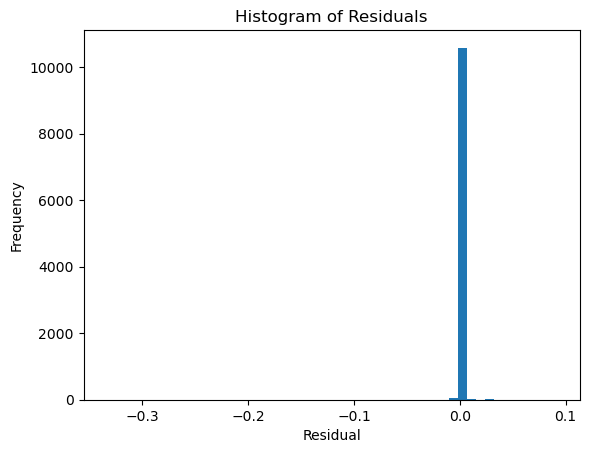

In [31]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### Checking and training the model using Logistic Regression

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

# Drop the Data_Value_Unit column
df.drop(columns=['Data_Value_Unit'], inplace=True)

# List of selected features
categorical_features = [var for var in df.columns if df[var].dtype == 'O']
numerical_features = [var for var in df.columns if df[var].dtype != 'O']
# Assuming 'Data_Value' is the target variable for obesity classification
# Let's create a binary target variable
# Here we assume a threshold to classify as obese
threshold = 30  # Adjust this threshold based on domain knowledge
df['Obese'] = (df['Data_Value'] >= threshold).astype(int)

# Define feature columns and target column
X = df[categorical_features + numerical_features]
y = df['Obese']

# Handle missing values
for var in numerical_features:
    X[var].fillna(X[var].mean(), inplace=True)

for var in categorical_features:
    X[var].fillna(X[var].mode()[0], inplace=True)

# Encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
# Pipeline: Use ColumnTransformer to preprocess features and LogisticRegression for classification within a Pipeline.
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Grid search for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Use the best model found
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)

print(f'Best Accuracy: {best_accuracy}')
print(f'Best Precision: {best_precision}')
print(f'Best Recall: {best_recall}')
print(f'Best F1 Score: {best_f1}')
print('\nBest Classification Report:\n', classification_report(y_test, y_pred_best))
print('\nBest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))


/tmp/ipykernel_6120/4235387545.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var].fillna(X[var].mean(), inplace=True)
/tmp/ipykernel_6120/4235387545.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var].fillna(X[var].mode()[0], inplace=True)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentat

Accuracy: 0.9893248431501077
Precision: 0.9920302849173142
Recall: 0.98535523451415
F1 Score: 0.98868149324861

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5626
           1       0.99      0.99      0.99      5053

    accuracy                           0.99     10679
   macro avg       0.99      0.99      0.99     10679
weighted avg       0.99      0.99      0.99     10679


Confusion Matrix:
 [[5586   40]
 [  74 4979]]


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best parameters found:  {'classifier__C': 100}
Best Accuracy: 0.9909167525049162
Best Precision: 0.9930362116991643
Best Recall: 0.9877300613496932
Best F1 Score: 0.9903760293679928

Best Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5626
           1       0.99      0.99      0.99      5053

    accuracy                           0.99     10679
   macro avg       0.99      0.99      0.99     10679
weighted avg       0.99      0.99      0.99     10679


Best Confusion Matrix:
 [[5591   35]
 [  62 4991]]


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
